In [5]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker

In [6]:
df = pd.read_csv("C:/Users/srini/Desktop/Code/Datasets/spotify.csv")
df = df.drop("Unnamed: 0",axis="columns")
df.head()
#Variables description : https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


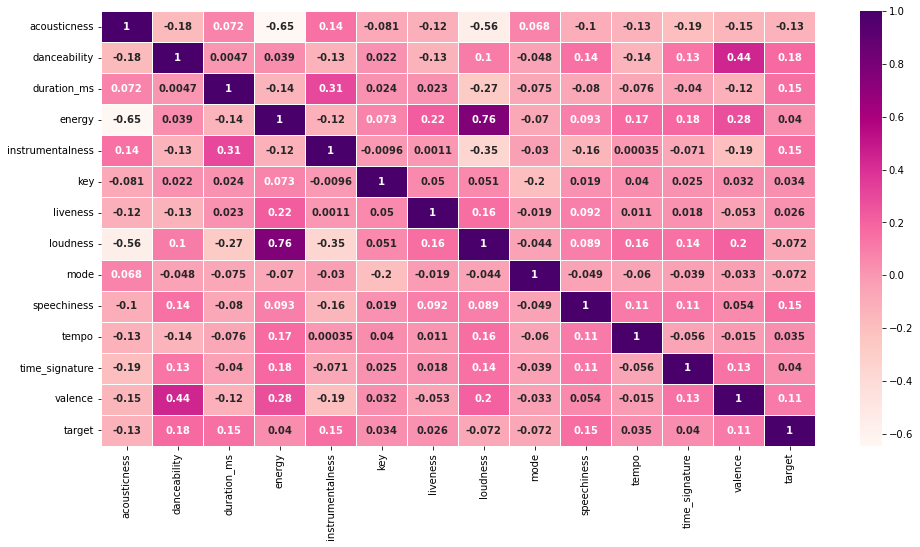

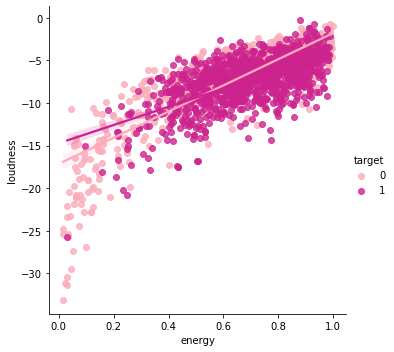

In [9]:
#HeatMap - highest correlation b/w loudness and energy
corr = df.corr()
fig1 = plot.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, annot_kws = {'weight':'bold'},linewidths=.5,cmap='RdPu')

sns.lmplot(y='loudness',x='energy',data=df,hue='target',palette='RdPu')
#scatterplot = if target is 1 then the track is hit and 0 if track is flop

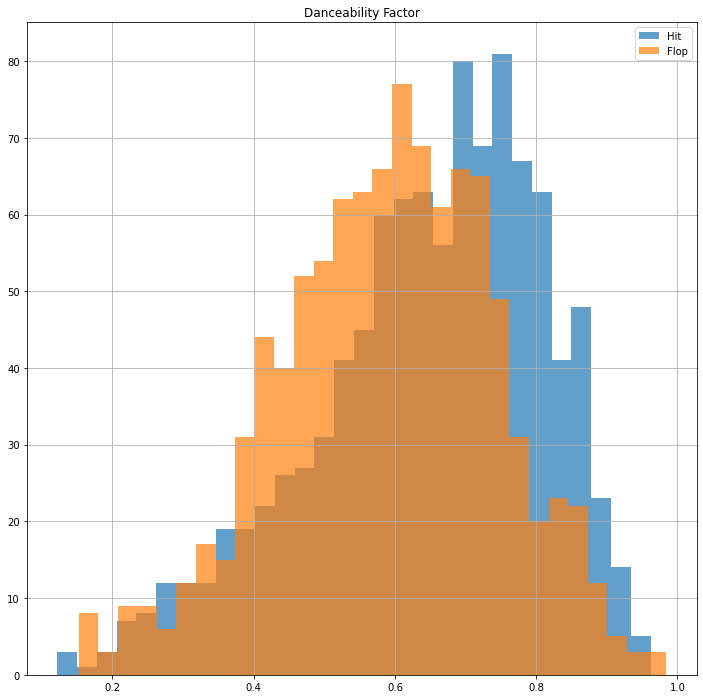

In [12]:
#Histogram : Dancebility variable to target => Pink is hit and Blue is flop. danceability increase, the chance of being hit is high
hit_dancebility = df[df['target']==1]['danceability']
flop_dancebility = df[df['target']==0]['danceability']
fig = plot.figure(figsize=(12,12))
plot.title("Danceability Factor")
hit_dancebility.hist(alpha=0.7,bins=30,label='Hit')
flop_dancebility.hist(alpha=0.7,bins=30,label='Flop')
plot.legend()

In [15]:
#Srranging the data with highest levels of instrumentalness
df.sort_values('instrumentalness',axis=0,ascending=False).head(10)[["instrumentalness","song_title","artist",]]

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


In [16]:
#Most frequent 10 artists
from collections import Counter
c = Counter(df['artist'])
c.most_common(10)

[('Drake', 16),
 ('Rick Ross', 13),
 ('Disclosure', 12),
 ('Backstreet Boys', 10),
 ('WALK THE MOON', 10),
 ('Crystal Castles', 9),
 ('FIDLAR', 9),
 ('Future', 8),
 ('Kanye West', 8),
 ('Fall Out Boy', 8)]

In [18]:
#sorted Drake’s songs by tempo
df[(df['artist'] == "Drake")].sort_values('tempo',axis=0,ascending=False)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1218,0.21900,0.427,257760,0.861,0.000000,1,0.2770,-4.874,1,0.3760,161.776,4.0,0.581,0,Best I Ever Had,Drake
440,0.36900,0.662,236733,0.571,0.000197,6,0.0908,-7.382,0,0.1060,152.009,4.0,0.442,1,Headlines,Drake
37,0.05650,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,4.0,0.677,1,Jumpman,Drake
117,0.00257,0.896,267024,0.623,0.000258,2,0.0390,-8.008,1,0.0571,134.962,4.0,0.564,1,Hotline Bling,Drake
154,0.00157,0.790,217707,0.676,0.000000,8,0.2500,-6.432,0,0.2710,132.002,4.0,0.314,1,Big Rings,Drake
1223,0.04310,0.697,277387,0.527,0.000013,0,0.0882,-10.438,0,0.2110,121.849,4.0,0.289,0,Take Care,Drake
158,0.19000,0.735,275840,0.410,0.000000,11,0.3410,-8.735,0,0.2000,114.812,4.0,0.160,1,Know Yourself,Drake
1183,0.30400,0.804,298941,0.459,0.086200,11,0.1100,-11.556,1,0.0390,111.963,4.0,0.372,0,Passionfruit,Drake
717,0.00349,0.772,227880,0.407,0.000024,6,0.0705,-7.442,0,0.0907,100.006,4.0,0.287,1,"Hold On, We're Going Home",Drake
676,0.00300,0.766,227027,0.453,0.000035,6,0.0923,-6.651,0,0.0670,100.002,4.0,0.346,1,"Hold On, We're Going Home",Drake
